In [1]:
from datascience import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
survey_data = pd.read_excel('Phase 2 End User Survey (3).xlsx', header = None, names = ['Date', 'Dept', 'Course', 
                                                                                        'Overall Rating', 'Useful', 'Clearly',
                                                                                        'Speed', 'Well', 'Comfortable', 
                                                                                        'Helpful', 'Comments']) 
survey_data.head()

,Date,Dept,Course,Overall Rating,Useful,Clearly,Speed,Well,Comfortable,Helpful,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,Dept,Course,Overall Rating,How useful were the course material?,How clearly did the instructor explain the mat...,Speed?,How well did instructor answer questions?,How comfortable did you feel voicing your opin...,How helpful was Tyler U in preparing for the c...,Comments
2,2021-04-06 00:00:00,ASD,GB Invoice Processing,Very Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Very Helpful,The course was very good. No changes at all.
3,2021-04-06 00:00:00,ASD,GB Invoice Processing,Very Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Very Helpful,NaN
4,2021-04-06 00:00:00,PD,GB Invoice Processing,Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Extremely Helpful,NaN


In [3]:
survey_data.drop(0, inplace = True)
survey_data.drop(1, inplace = True)
survey_data.reset_index(inplace = True)
survey_data.drop(['index'], axis = 1, inplace = True)
#survey_data.drop([53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], inplace = True)
survey_data.replace(np.nan, "N/A", regex = True, inplace = True)
survey_data.head()

,Date,Dept,Course,Overall Rating,Useful,Clearly,Speed,Well,Comfortable,Helpful,Comments
0,2021-04-06,ASD,GB Invoice Processing,Very Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Very Helpful,The course was very good. No changes at all.
1,2021-04-06,ASD,GB Invoice Processing,Very Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Very Helpful,N/A
2,2021-04-06,PD,GB Invoice Processing,Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Extremely Helpful,N/A
3,2021-04-06,PD,GB Invoice Processing,Good,Very Useful,Very Clearly,Too Fast,Very Well,Somewhat Comfortable,Very Helpful,N/A
4,2021-04-06,PD,GB Invoice Processing,Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,N/A,More exercises for practice purposes & clarity


In [4]:
survey_data

,Date,Dept,Course,Overall Rating,Useful,Clearly,Speed,Well,Comfortable,Helpful,Comments
0,2021-04-06,ASD,GB Invoice Processing,Very Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Very Helpful,The course was very good. No changes at all.
1,2021-04-06,ASD,GB Invoice Processing,Very Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Very Helpful,N/A
2,2021-04-06,PD,GB Invoice Processing,Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Extremely Helpful,N/A
3,2021-04-06,PD,GB Invoice Processing,Good,Very Useful,Very Clearly,Too Fast,Very Well,Somewhat Comfortable,Very Helpful,N/A
4,2021-04-06,PD,GB Invoice Processing,Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,N/A,More exercises for practice purposes & clarity
...,...,...,...,...,...,...,...,...,...,...,...
67,2021-04-28,ASD,Tyler Cashiering - Hands-On Workshop,Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Somewhat helpful,Cannot really suggest improvements at this poi...
68,2021-04-28,ASD,Tyler Cashiering - Hands-On Workshop,Very Good,Very Useful,Very Clearly,The right amount,Very Well,Very Comfortable,Very Helpful,N/A
69,2021-04-28,PD,Tyler Cashiering - Hands-On Workshop,Very Good,Extremely Useful,Extremely Clear,The right amount,Extremely Well,Extremely Comfortable,N/A,Mackenzie is great!
70,2021-04-28,PD,Tyler Cashiering - Hands-On Workshop,Very Good,Very Useful,Extremely Clear,The right amount,Very Well,Extremely Comfortable,Very Helpful,N/A


In [5]:
survey_data.shape

(72, 11)

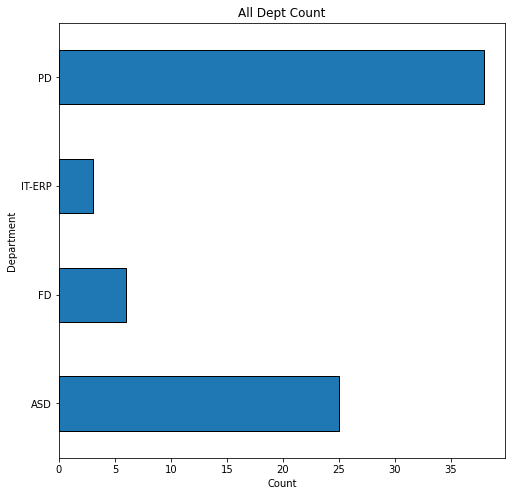

In [22]:
survey_data['Dept'] = pd.Categorical(survey_data['Dept'], categories = ['ASD', 'FD', 'IT-ERP', 'PD'], ordered = True)
value = survey_data['Dept'].value_counts().sort_index()

value.plot(kind = 'barh', figsize = (8,8));
plt.title('All Dept Count');
plt.xlabel('Count');
plt.ylabel('Department');

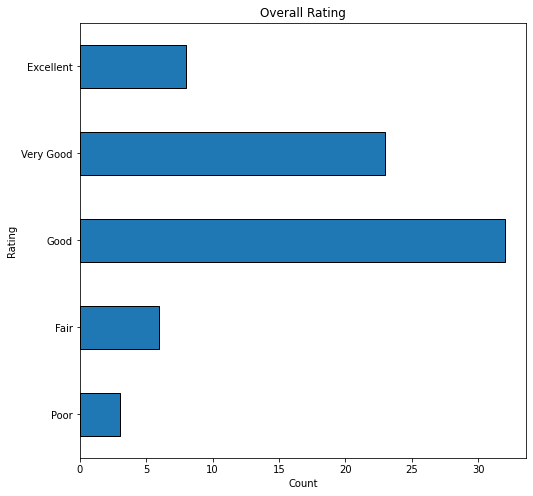

In [7]:
survey_data['Overall Rating'] = pd.Categorical(survey_data['Overall Rating'], categories = ['Poor', 'Fair', 'Good', 
                                                                                              'Very Good', 'Excellent'], 
                                                ordered = True)
value = survey_data['Overall Rating'].value_counts().sort_index()
value.plot(kind = 'barh', figsize = (8,8));
plt.title('Overall Rating');
plt.xlabel('Count');
plt.ylabel('Rating');

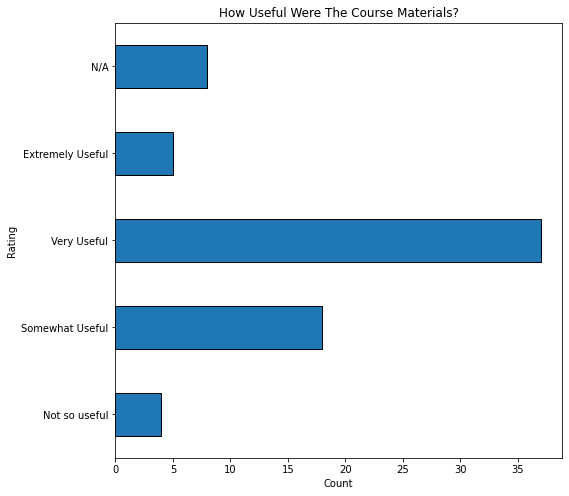

In [8]:
survey_data['Useful'] = pd.Categorical(survey_data['Useful'], categories = ['Not so useful', 'Somewhat Useful', 'Very Useful', 
                                                                              'Extremely Useful', "N/A"], ordered = True)
value = survey_data['Useful'].value_counts().sort_index()
value.plot(kind = 'barh', figsize = (8,8));
plt.title('How Useful Were The Course Materials?');
plt.xlabel('Count');
plt.ylabel('Rating');

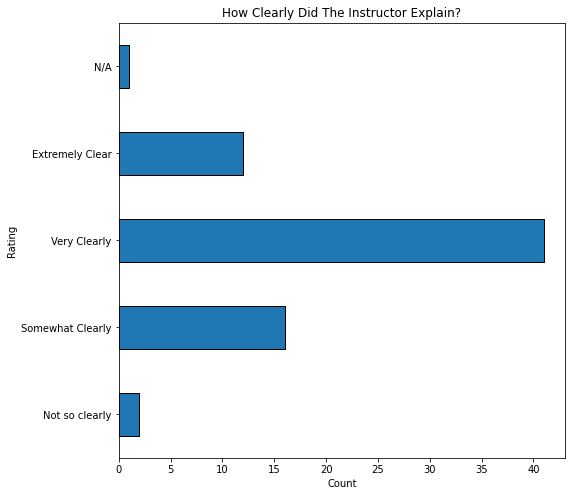

In [9]:
survey_data['Clearly'] = pd.Categorical(survey_data['Clearly'], categories = ['Not so clearly', 
                                                                              'Somewhat Clearly', 'Very Clearly', 
                                                                              'Extremely Clear', 'N/A'], ordered = True)
value = survey_data['Clearly'].value_counts().sort_index()
value.plot(kind = 'barh', figsize = (8,8));
plt.title('How Clearly Did The Instructor Explain?');
plt.xlabel('Count');
plt.ylabel('Rating');

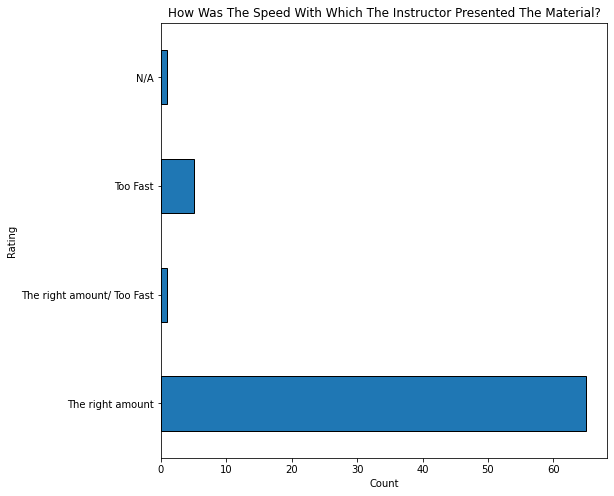

In [10]:
survey_data['Speed'] = pd.Categorical(survey_data['Speed'], categories = [ 'The right amount', 'The right amount/ Too Fast', 
                                                                              'Too Fast', 'N/A'], ordered = True)
value = survey_data['Speed'].value_counts().sort_index()
value.plot(kind = 'barh', figsize = (8,8));
plt.title('How Was The Speed With Which The Instructor Presented The Material?');
plt.xlabel('Count');
plt.ylabel('Rating');

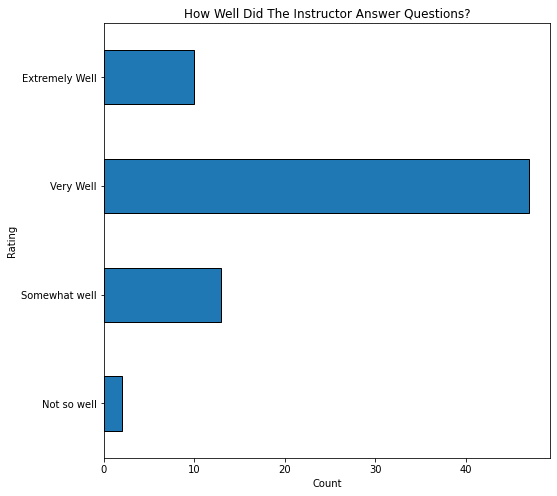

In [11]:
survey_data['Well'] = pd.Categorical(survey_data['Well'], categories = ['Not so well', 
                                                                              'Somewhat well', 'Very Well', 
                                                                              'Extremely Well'], ordered = True)
value = survey_data['Well'].value_counts().sort_index()
value.plot(kind = 'barh', figsize = (8,8));
plt.title('How Well Did The Instructor Answer Questions?');
plt.xlabel('Count');
plt.ylabel('Rating');

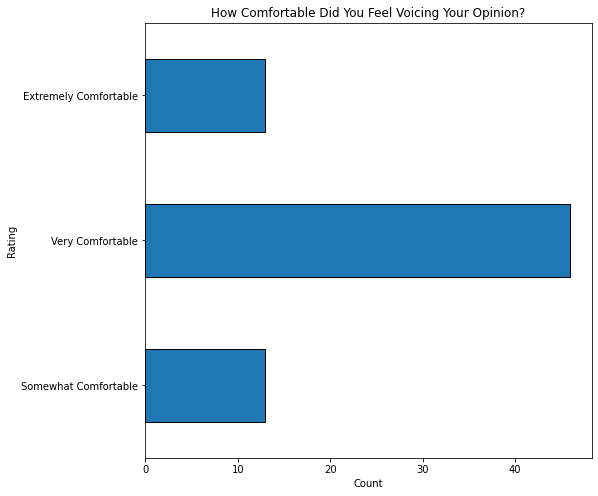

In [12]:
survey_data['Comfortable'] = pd.Categorical(survey_data['Comfortable'], categories = [
                                                                              'Somewhat Comfortable', 'Very Comfortable', 
                                                                              'Extremely Comfortable'], ordered = True)
value = survey_data['Comfortable'].value_counts().sort_index()
value.plot(kind = 'barh', figsize = (8,8));
plt.title('How Comfortable Did You Feel Voicing Your Opinion?');
plt.xlabel('Count');
plt.ylabel('Rating');

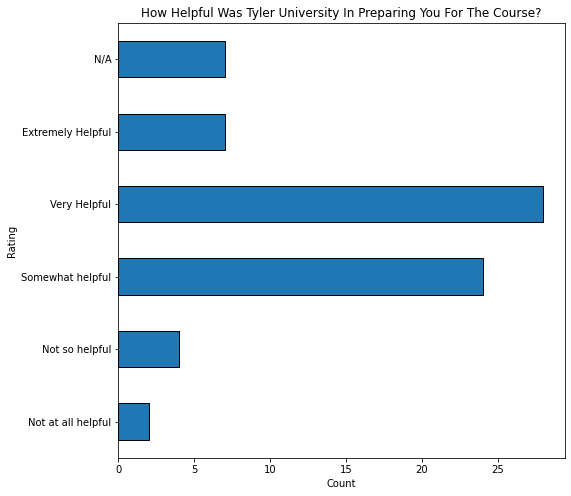

In [13]:
survey_data['Helpful'] = pd.Categorical(survey_data['Helpful'], categories = ['Not at all helpful', 'Not so helpful', 
                                                                              'Somewhat helpful', 'Very Helpful', 
                                                                              'Extremely Helpful', 'N/A'], ordered = True)
value = survey_data['Helpful'].value_counts().sort_index()
value.plot(kind = 'barh', figsize = (8,8));
plt.title('How Helpful Was Tyler University In Preparing You For The Course?');
plt.xlabel('Count');
plt.ylabel('Rating');

In [14]:
def pos_neg(df):
    df = df.copy()
    df['Overall Rating'] = df['Overall Rating'].map({'Poor' : 'Negative', 'Fair' : 'Negative', 'Good' : 'Neutral', 
                                                     'Very Good' : 'Positive', 'Excellent' : 'Positive'})
    df['Useful'] = df['Useful'].map({'Not so useful' : 'Negative', 
                                     'Somewhat Useful' : 'Neutral', 'Very Useful' : 'Positive', 
                                     'Extremely Useful' : 'Positive'})
    df['Clearly'] = df['Clearly'].map({'Not so clearly' : 'Negative', 
                                     'Somewhat Clearly' : 'Neutral', 'Very Clearly' : 'Positive', 
                                     'Extremely Clear' : 'Positive'})
    df['Speed'] = df['Speed'].map({'The right amount' : 'Positive', 'The right amount/ Too Fast' : 'Negative', 
                                   'Too Fast' : 'Negative'})
    df['Well'] = df['Well'].map({'Not so well' : 'Negative', 
                                     'Somewhat well' : 'Neutral', 'Very Well' : 'Positive', 
                                     'Extremely Well' : 'Positive'})
    df['Comfortable'] = df['Comfortable'].map({
                                     'Somewhat Comfortable' : 'Neutral', 'Very Comfortable' : 'Positive', 
                                     'Extremely Comfortable' : 'Positive'})
    df['Helpful'] = df['Helpful'].map({'Not at all helpful' : 'Negative', 'Not so helpful' : 'Negative', 
                                     'Somewhat helpful' : 'Neutral', 'Very Helpful' : 'Positive', 
                                     'Extremely Helpful' : 'Positive'})
    return df

In [15]:
pos_neg_data = pos_neg(survey_data)
pos_neg_data.head()

,Date,Dept,Course,Overall Rating,Useful,Clearly,Speed,Well,Comfortable,Helpful,Comments
0,2021-04-06,ASD,GB Invoice Processing,Positive,Positive,Positive,Positive,Positive,Positive,Positive,The course was very good. No changes at all.
1,2021-04-06,ASD,GB Invoice Processing,Positive,Positive,Positive,Positive,Positive,Positive,Positive,N/A
2,2021-04-06,PD,GB Invoice Processing,Neutral,Positive,Positive,Positive,Positive,Positive,Positive,N/A
3,2021-04-06,PD,GB Invoice Processing,Neutral,Positive,Positive,Negative,Positive,Neutral,Positive,N/A
4,2021-04-06,PD,GB Invoice Processing,Neutral,Positive,Positive,Positive,Positive,Positive,NaN,More exercises for practice purposes & clarity


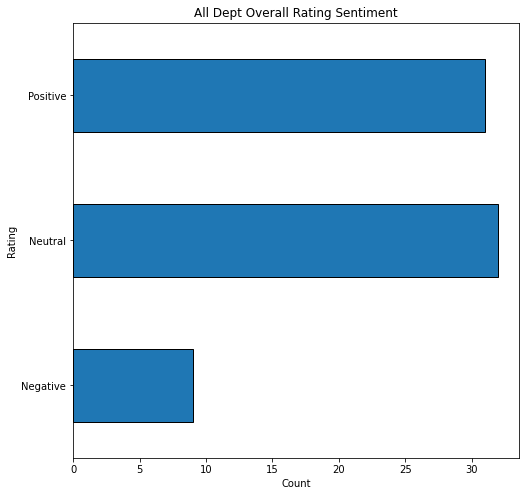

In [16]:
pos_neg_data['Overall Rating'] = pd.Categorical(pos_neg_data['Overall Rating'], categories = ['Negative', 'Neutral', 
                                                                                              'Positive'], ordered = True)
pos_neg_data_rating = pos_neg_data['Overall Rating'].value_counts().sort_index()
pos_neg_data_rating.plot(kind = "barh", figsize = (8,8));
plt.title('All Dept Overall Rating Sentiment');
plt.xlabel('Count');
plt.ylabel('Rating');

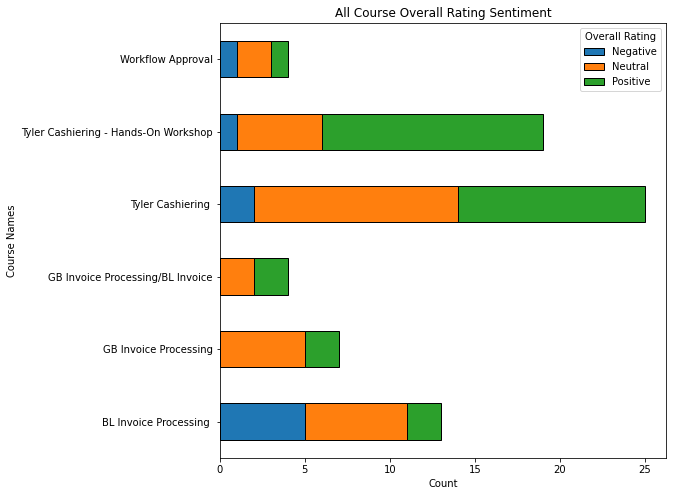

In [17]:
pos_neg_data.groupby(['Course', 'Overall Rating']).size().unstack().plot(kind='barh', figsize = (8,8),stacked=True);
plt.title('All Course Overall Rating Sentiment')
plt.xlabel('Count')
plt.ylabel('Course Names')
plt.show()

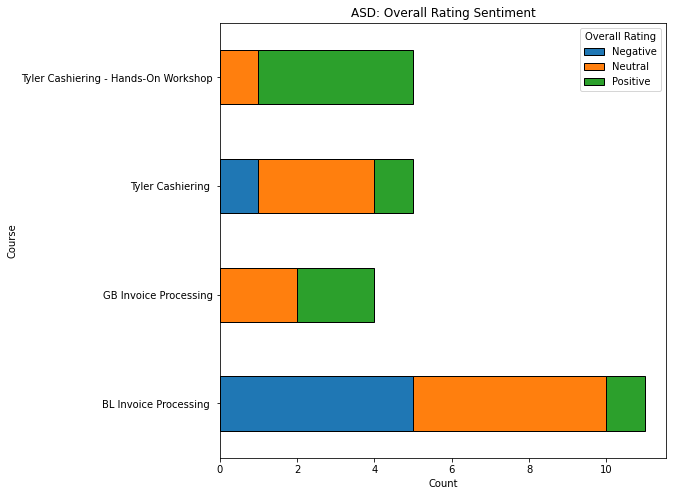

In [18]:
ASD_sent = pos_neg_data[pos_neg_data['Dept'] == 'ASD']
ASD_sent.groupby(['Course', 'Overall Rating']).size().unstack().plot(kind='barh', figsize = (8,8), stacked=True);
plt.xlabel("Count");
plt.ylabel("Course");
plt.title('ASD: Overall Rating Sentiment');

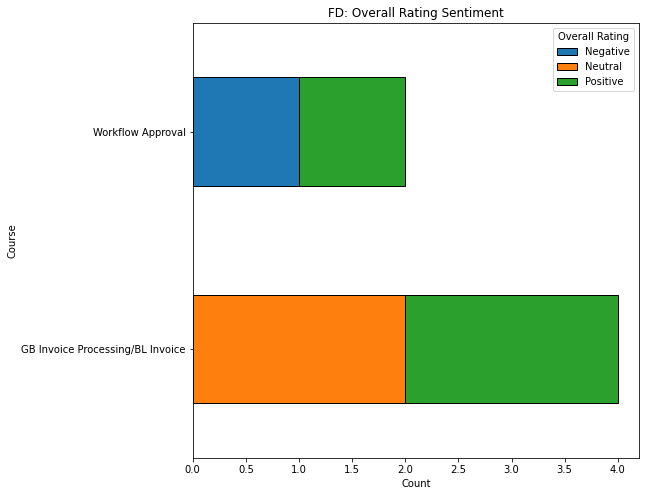

In [19]:
FD_sent = pos_neg_data[pos_neg_data['Dept'] == 'FD']
FD_sent.groupby(['Course', 'Overall Rating']).size().unstack().plot(kind='barh', figsize = (8,8), stacked=True);
plt.xlabel("Count");
plt.ylabel("Course");
plt.title('FD: Overall Rating Sentiment');

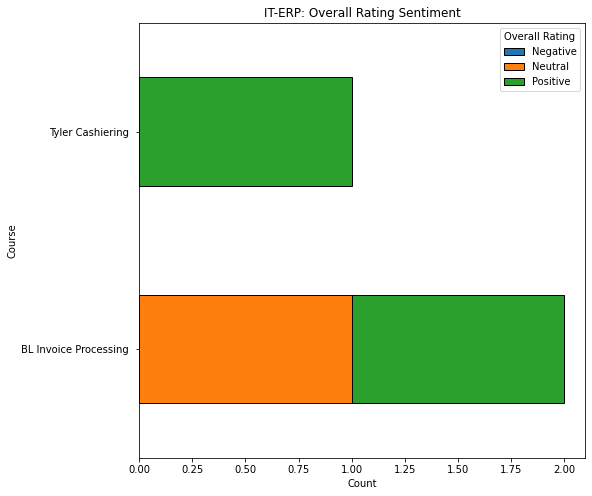

In [20]:
IT_sent = pos_neg_data[pos_neg_data['Dept'] == 'IT-ERP']
IT_sent.groupby(['Course', 'Overall Rating']).size().unstack().plot(kind='barh', figsize = (8,8), stacked=True);
plt.xlabel("Count");
plt.ylabel("Course");
plt.title('IT-ERP: Overall Rating Sentiment');

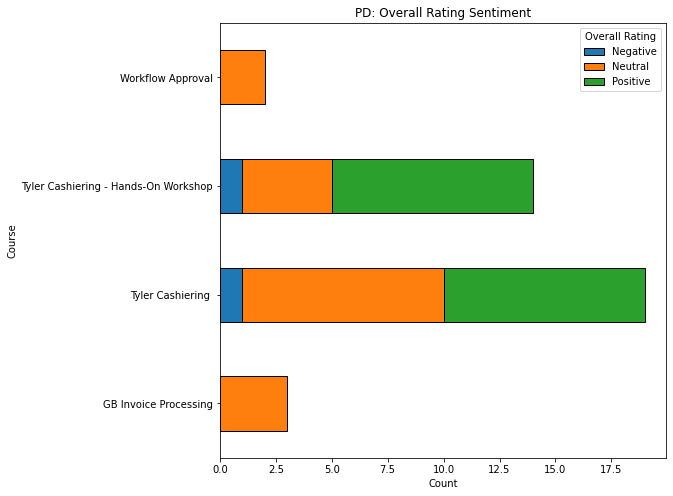

In [21]:
PD_sent = pos_neg_data[pos_neg_data['Dept'] == 'PD']
PD_sent.groupby(['Course', 'Overall Rating']).size().unstack().plot(kind='barh', figsize = (8,8), stacked=True);
plt.xlabel("Count");
plt.ylabel("Course");
plt.title('PD: Overall Rating Sentiment');